In [1]:
import numpy as np 
# Epydemix import
import sys
sys.path.append("../")
from epydemix.epimodel import EpiModel
from epydemix.plotting import plot_quantiles, plot_spectral_radius
from epydemix.utils import create_definitions, convert_to_2Darray, evaluate, compute_days

In [2]:
# create model 
model = EpiModel(compartments=["S", "I", "R"], population_data_path="../epydemix_data/Indonesia/", population_name="Indonesia")

In [3]:
# Scalar parameters
model.add_parameter(name="beta", value=0.04)
definitions = create_definitions(model.parameters, T=100, n_age=model.population.Nk.shape[0])

print(definitions["beta"].shape)
definitions

(100, 16)


{'beta': array([[0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
        ...,
        [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04]])}

In [4]:
# Time-varying parameter with wrong length
model.add_parameter(name="beta", value=np.random.uniform(0.01, 0.1, 80))
definitions = create_definitions(model.parameters, T=100, n_age=model.population.Nk.shape[0])

print(definitions["beta"].shape)
definitions

ValueError: The length of the 1D iterable for parameter 'beta' is smaller than simulation length (100).

In [5]:
# Time-varying parameter with correct length
model.add_parameter(name="beta", value=np.random.uniform(0.01, 0.1, 100))
definitions = create_definitions(model.parameters, T=100, n_age=model.population.Nk.shape[0])

print(definitions["beta"].shape)
definitions

(100, 16)


{'beta': array([[0.02227799, 0.02227799, 0.02227799, ..., 0.02227799, 0.02227799,
         0.02227799],
        [0.05517772, 0.05517772, 0.05517772, ..., 0.05517772, 0.05517772,
         0.05517772],
        [0.02021691, 0.02021691, 0.02021691, ..., 0.02021691, 0.02021691,
         0.02021691],
        ...,
        [0.06695061, 0.06695061, 0.06695061, ..., 0.06695061, 0.06695061,
         0.06695061],
        [0.06606288, 0.06606288, 0.06606288, ..., 0.06606288, 0.06606288,
         0.06606288],
        [0.01094124, 0.01094124, 0.01094124, ..., 0.01094124, 0.01094124,
         0.01094124]])}

In [6]:
# Age-varying parameter with correct length
beta = np.random.uniform(0.01, 0.1, 16)
beta = convert_to_2Darray(beta)   # equivalent to np.random.uniform(0.01, 0.1, (1, 16))
model.add_parameter(name="beta", value=beta)
definitions = create_definitions(model.parameters, T=100, n_age=model.population.Nk.shape[0])

print(definitions["beta"].shape)
definitions

(100, 16)


{'beta': array([[0.04828284, 0.0152147 , 0.05359077, ..., 0.07515806, 0.04872697,
         0.02039175],
        [0.04828284, 0.0152147 , 0.05359077, ..., 0.07515806, 0.04872697,
         0.02039175],
        [0.04828284, 0.0152147 , 0.05359077, ..., 0.07515806, 0.04872697,
         0.02039175],
        ...,
        [0.04828284, 0.0152147 , 0.05359077, ..., 0.07515806, 0.04872697,
         0.02039175],
        [0.04828284, 0.0152147 , 0.05359077, ..., 0.07515806, 0.04872697,
         0.02039175],
        [0.04828284, 0.0152147 , 0.05359077, ..., 0.07515806, 0.04872697,
         0.02039175]])}

In [7]:
# Age and time-varying parameter with correct length
model.add_parameter(name="beta", value= np.random.uniform(0.01, 0.1, size=(100, 16)))
definitions = create_definitions(model.parameters, T=100, n_age=model.population.Nk.shape[0])

print(definitions["beta"].shape)
definitions

(100, 16)


{'beta': array([[0.04942321, 0.06755433, 0.09915804, ..., 0.06586507, 0.08817122,
         0.04538487],
        [0.07349989, 0.05038889, 0.04775763, ..., 0.08147465, 0.04612225,
         0.02664316],
        [0.09718285, 0.01786722, 0.04050253, ..., 0.05870846, 0.01287233,
         0.06923616],
        ...,
        [0.02014918, 0.039617  , 0.05977875, ..., 0.03560857, 0.01400002,
         0.03023588],
        [0.01358508, 0.02371454, 0.06501339, ..., 0.05331355, 0.02205145,
         0.09828766],
        [0.09229584, 0.05534499, 0.03774595, ..., 0.04505105, 0.08494117,
         0.02801398]])}

In [21]:
# simulation
start_date, end_date = "2019-12-01", "2020-04-01"
T = compute_days(start_date, end_date)

# Simulation
# create model 
model = EpiModel(compartments=["S", "I", "R"], population_data_path="../epydemix_data/Indonesia/", population_name="Indonesia")

# define parameters
beta = np.linspace(0.03, 0.03, T)
beta[50:] = 0.1
model.add_parameter(name="beta", value=beta)
model.add_parameter(name="mu", value=0.2)

# add transitions 
model.add_transition(source="S", target="I", rate="beta", agent="I")
model.add_transition(source="I", target="R", rate="mu")

In [22]:
results = model.run_simulations(start_date="2019-12-01", 
                                end_date="2020-04-01", 
                                S=model.population.Nk - np.ones(len(model.population.Nk)),
                                I=np.ones(len(model.population.Nk)),
                                steps="daily", 
                                Nsim=100)
plot_quantiles(results, columns=["I_total", "S_total", "R_total"])

In [26]:
# simulation
start_date, end_date = "2019-12-01", "2020-04-01"
T = compute_days(start_date, end_date)

# Simulation
# create model 
model = EpiModel(compartments=["S", "I", "R"], population_data_path="../epydemix_data/Indonesia/", population_name="Indonesia")

# define parameters
beta = np.linspace(0.03, 0.03, model.population.Nk.shape[0])
beta[[0, 4, 8]] = 0.0

beta = convert_to_2Darray(beta)
model.add_parameter(name="beta", value=beta)
model.add_parameter(name="mu", value=0.2)

# add transitions 
model.add_transition(source="S", target="I", rate="beta", agent="I")
model.add_transition(source="I", target="R", rate="mu")

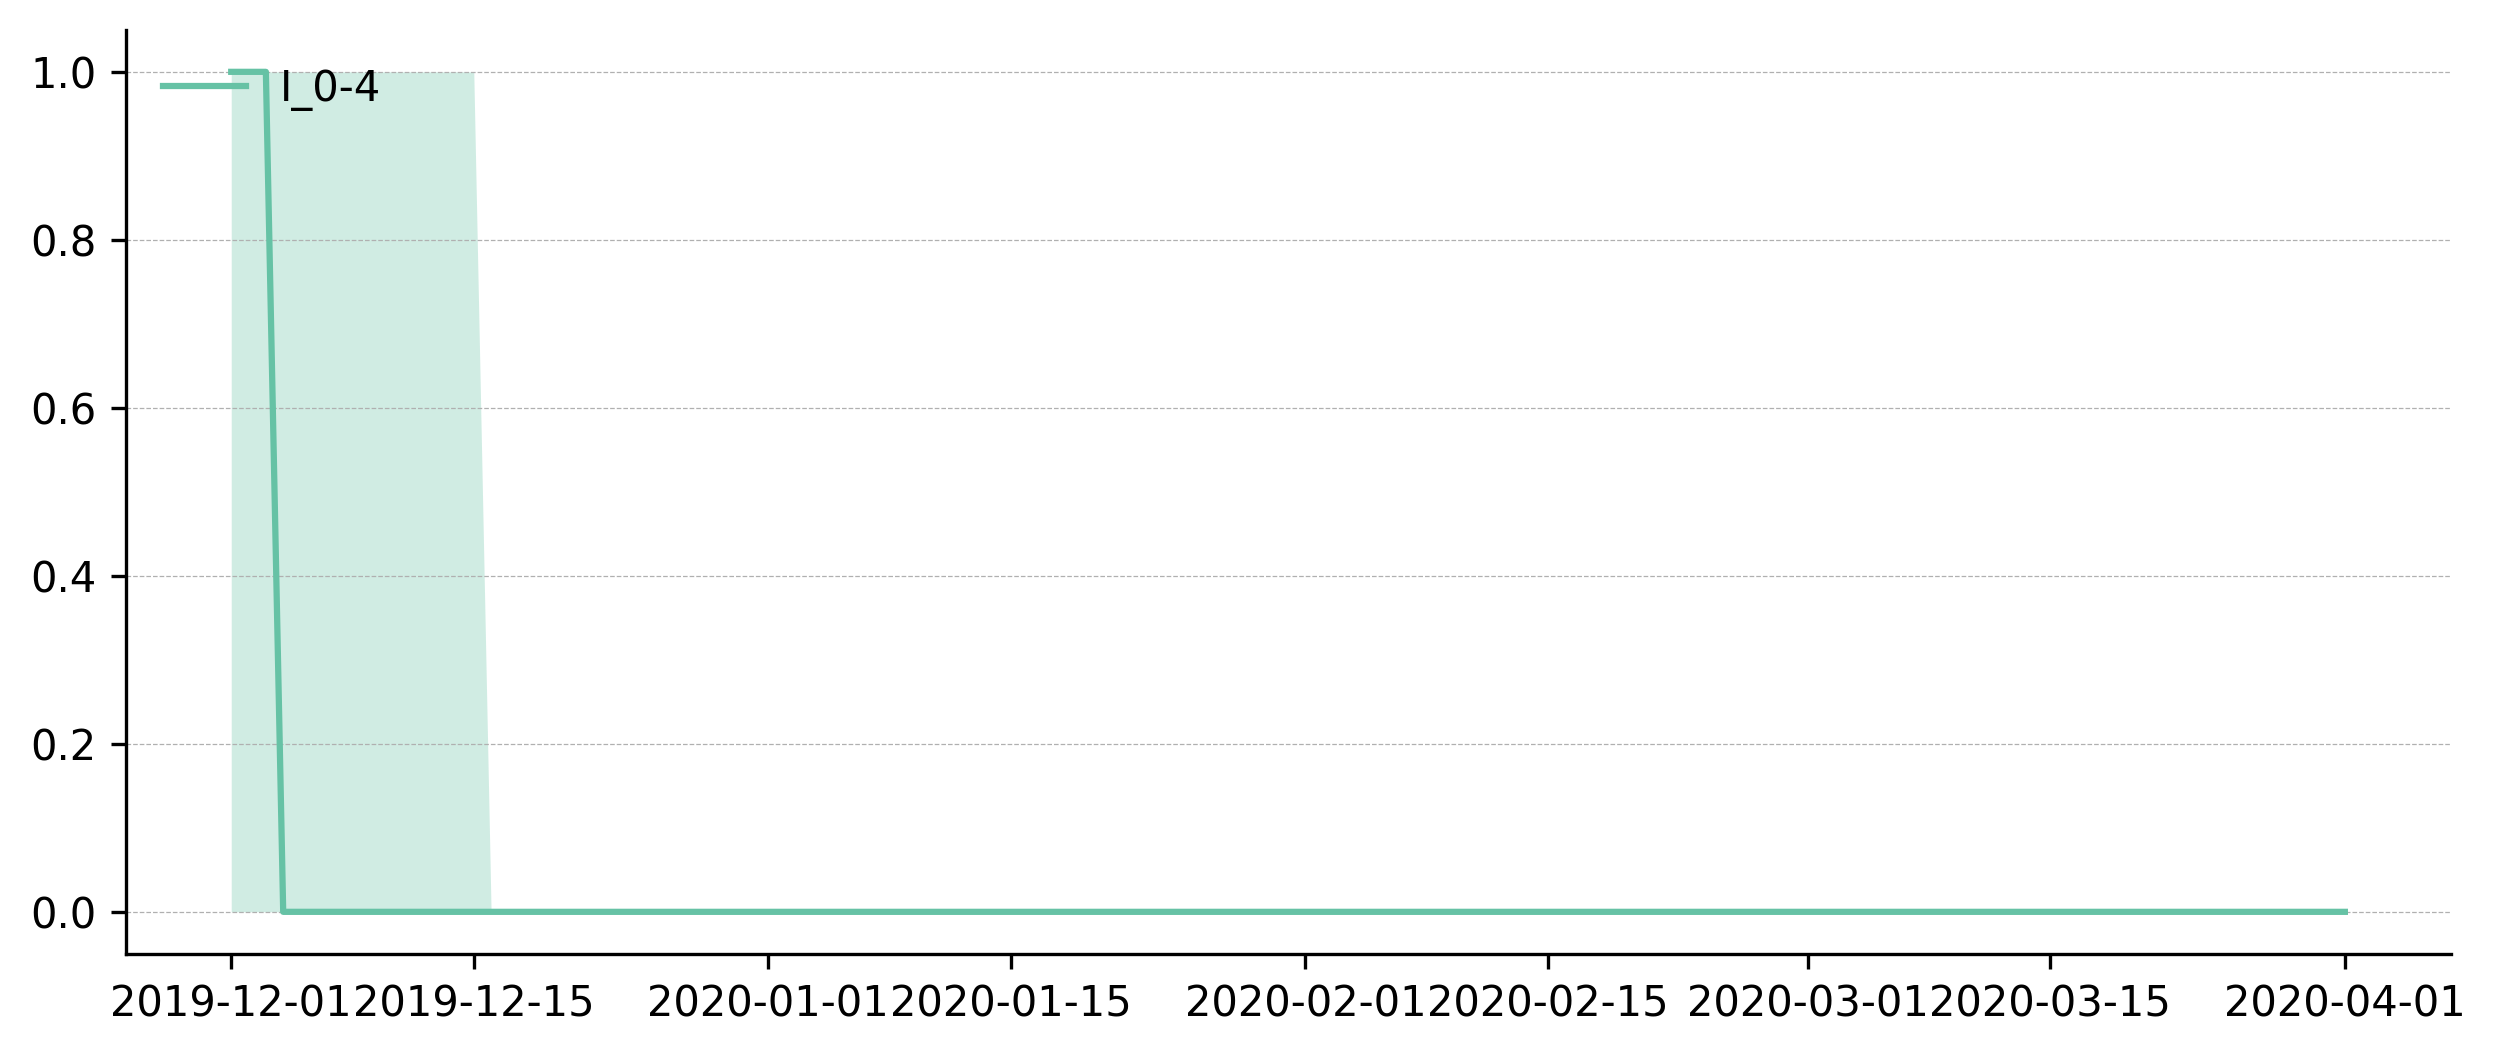

In [30]:
results = model.run_simulations(start_date="2019-12-01", 
                                end_date="2020-04-01", 
                                S=model.population.Nk - np.ones(len(model.population.Nk)),
                                I=np.ones(len(model.population.Nk)),
                                steps="daily", 
                                Nsim=100)

plot_quantiles(results, columns=["I_0-4"])

In [ ]:
plot_quantiles(results, columns=["I_total", "S_total", "R_total"])

In [28]:
model.population.Nk_names

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75+'], dtype=object)